# Reducing the Dimensionality of the Data

The **curse of dimensionality**: The number of data points needed to fill the available space grows exponentially with the number of dimensions.

In practice, the curse of dimensionality means that for a given
sample size, there is a maximum number of features above which the performance of our classifier will
degrade rather than improve.

That's why you often want to reduce the **dimensionality** of your data.

## Implementing Principal Component Analysis (PCA) in OpenCV

One of the most common dimensionality reduction techniques is called **Principal
Component Analysis (PCA)**.

What PCA does is rotate all data points until the data lie aligned with the two axes (the two
inset vectors) that explain most of the spread of the data. PCA considers these two axes to
be the most informative, because if you walk along them, you can see most of the data
points separated. In more technical terms, PCA aims to transform the data to a new
coordinate system by means of an orthogonal linear transformation. The new coordinate
system is chosen such that if you project the data onto these new axes, the first coordinate
(called the first principal component) observes the greatest variance.

Let's have a look at some random data drawn from a multivariate Gaussian:

In [11]:
import numpy as np
mean = [20, 20]
cov = [[12, 8], [8, 18]]
np.random.seed(42)
x, y = np.random.multivariate_normal(mean, cov, 1000).T

We can plot this data using Matplotlib:

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

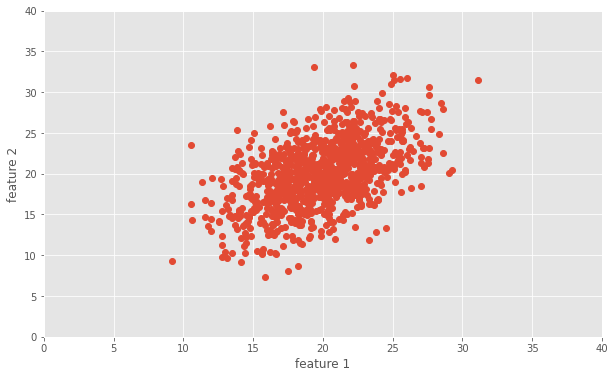

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', zorder=1)
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

In order to compute the principal components, we need to stack the `x` and `y` coordinates:

In [14]:
X = np.vstack((x, y)).T

Then we can compute PCA on the feature matrix `X`. We also specify an empty array `np.array([])` for the
mask argument, which tells OpenCV to use all data points in the feature matrix:

In [15]:
import cv2
mu, eig = cv2.PCACompute(X, np.array([]))
eig

array([[-0.57128392, -0.82075251],
       [-0.82075251,  0.57128392]])

Let's plot the eigenvectors of the decomposition on top of the data:

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

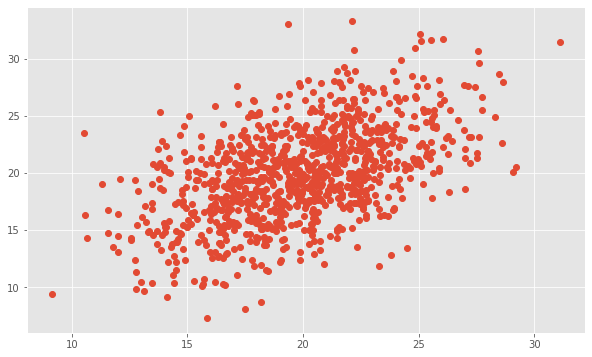

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(x, y, 'o', zorder=1)
plt.quiver(mean[0], mean[1], eig[:, 0], eig[:, 1], zorder=3, scale=0.2, units='xy')
plt.text(mean[0] + 5 * eig[0, 0], mean[1] + 5 * eig[0, 1], 'u1', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.text(mean[0] + 7 * eig[1, 0], mean[1] + 4 * eig[1, 1], 'u2', zorder=5, 
         fontsize=16, bbox=dict(facecolor='white', alpha=0.6))
plt.axis([0, 40, 0, 40])
plt.xlabel('feature 1')
plt.ylabel('feature 2');

We said PCA rotates the data so that the two axes (`x` and `y`) are aligned with the first two principal components:

In [18]:
X2 = cv2.PCAProject(X, mu, eig)
X2.shape

(1000, 2)

If we plot this, we should see the blob of data rotated so that the most spread is along the `x` axis:

(-20.0, 20.0, -10.0, 10.0)

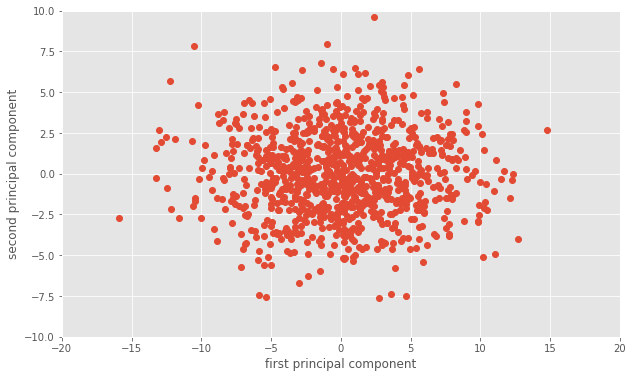

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.axis([-20, 20, -10, 10])

## Implementing Independent Component Analysis (ICA)

Other useful dimensionality reduction techniques that are closely related to PCA are
provided by scikit-learn, but not OpenCV. We mention them here for the sake of
completeness. **Independent Component Analysis (ICA)** performs the same mathematical
steps as PCA, but it chooses the components of the decomposition to be as independent as
possible from each other.

In scikit-learn, ICA is available from the `decomposition` module:

In [ ]:
from sklearn import decomposition

Like all other optimizers, first instantiate, then use the `fit_transform` method:

In [ ]:
ica = decomposition.FastICA(tol=0.005)

In [ ]:
X2 = ica.fit_transform(X)

We can plot the projected data on the first two independent components:

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first independent component')
plt.ylabel('second independent component')
plt.axis([-0.2, 0.2, -0.2, 0.2])

## Implementing Nonnegative Matrix Factorization (NMF)

Another useful dimensionality reduction technique is called **Nonnegative Matrix
Factorization (NMF)**. It again implements the same basic mathematical operations as PCA
and ICA, but it has the additional constraint that it only operates on non-negative data. In
other words, we cannot have negative values in our feature matrix if we want to use NMF;
the resulting components of the decomposition will all have non-negative values as well.

In scikit-learn, calling NMF works exactly like ICA:

In [ ]:
nmf = decomposition.NMF()

In [ ]:
X2 = nmf.fit_transform(X)

However, the resulting decomposition looks noticeably different from both PCA and ICA,
which is a hallmark of NMF:

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X2[:, 0], X2[:, 1], 'o')
plt.xlabel('first non-negative component')
plt.ylabel('second non-negative component')
plt.axis([-5, 20, -5, 10])

Now that we are familiar with some of the most common data decomposition tools, let's
have a look at some common data types.